# mlr3：模型解释
关于模型解释平常接触的不是特别多，简单学习下。

理论上，所有通用的模型解释框架都可应用于mlr3，只需要把训练好的模型从Learner对象中提取出来即可。

目前最受欢迎的两个框架分别是：
- iml
- DALEX

## IML
关于iml包进行模型解释有专门一本书：IML Book。这里简单介绍。
##企鹅任务
企鹅数据包括8个变量，344个企鹅（344行）。

In [1]:
data("penguins", package = "palmerpenguins")
str(penguins)


tibble [344 × 8] (S3: tbl_df/tbl/data.frame)
 $ species          : Factor w/ 3 levels "Adelie","Chinstrap",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ island           : Factor w/ 3 levels "Biscoe","Dream",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ bill_length_mm   : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ bill_depth_mm    : num [1:344] 18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int [1:344] 181 186 195 NA 193 190 181 195 193 190 ...
 $ body_mass_g      : int [1:344] 3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : Factor w/ 2 levels "female","male": 2 1 1 NA 1 2 1 2 NA NA ...
 $ year             : int [1:344] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...


## 创建任务：

In [3]:
library(iml)
library(mlr3)
library(mlr3learners)

set.seed(1)
penguins <- na.omit(penguins)
task_peng <- as_task_classif(penguins,
    target = "species"
)


选择模型并训练，提取模型：

In [4]:
learner <- lrn("classif.ranger", predict_type = "prob")
learner$train(task_peng)
learner$model


Ranger result

Call:
 ranger::ranger(dependent.variable.name = task$target_names, data = task$data(),      probability = self$predict_type == "prob", case.weights = task$weights$weight,      num.threads = 1L) 

Type:                             Probability estimation 
Number of trees:                  500 
Sample size:                      333 
Number of independent variables:  7 
Mtry:                             2 
Target node size:                 10 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error (Brier s.):  0.01790106 

In [6]:
names(penguins)


[1] "species"           "island"            "bill_length_mm"   
[4] "bill_depth_mm"     "flipper_length_mm" "body_mass_g"      
[7] "sex"               "year"

In [7]:
x <- penguins[which(names(penguins) != "species")]
x


island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Torgersen,39.1,18.7,181,3750,male,2007
Torgersen,39.5,17.4,186,3800,female,2007
Torgersen,40.3,18.0,195,3250,female,2007
Torgersen,36.7,19.3,193,3450,female,2007
Torgersen,39.3,20.6,190,3650,male,2007
Torgersen,38.9,17.8,181,3625,female,2007
Torgersen,39.2,19.6,195,4675,male,2007
Torgersen,41.1,17.6,182,3200,female,2007
Torgersen,38.6,21.2,191,3800,male,2007


In [8]:
model <- Predictor$new(learner,
    data = x, y = penguins$species
)


## FeatureEffects

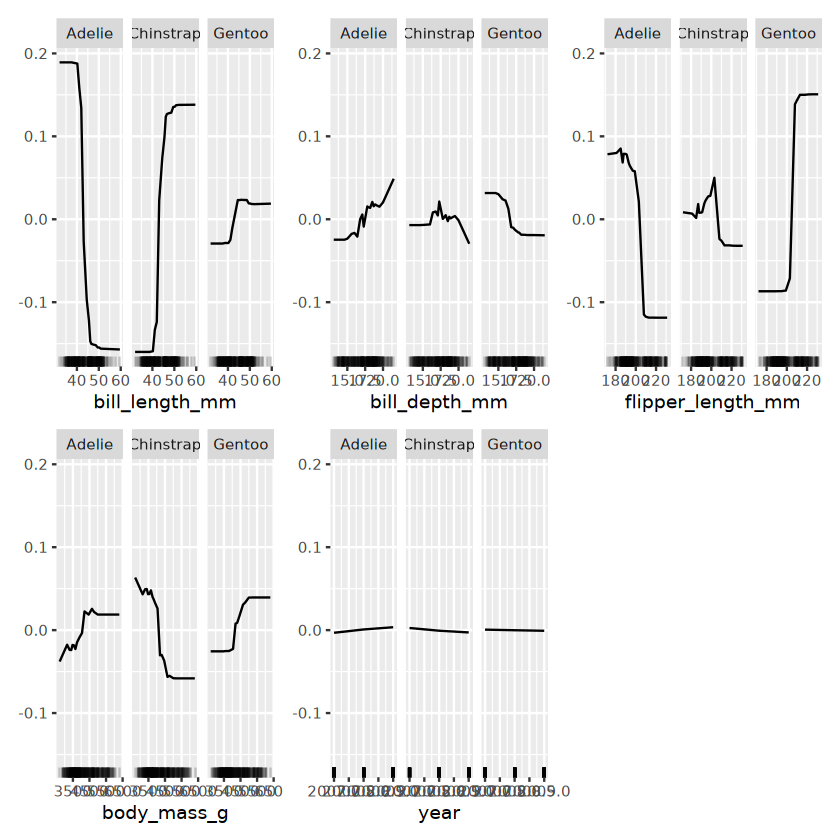

In [9]:
num_features <- c(
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
    "year"
)
effect <- FeatureEffects$new(model)
plot(effect, features = num_features)


## Shapley


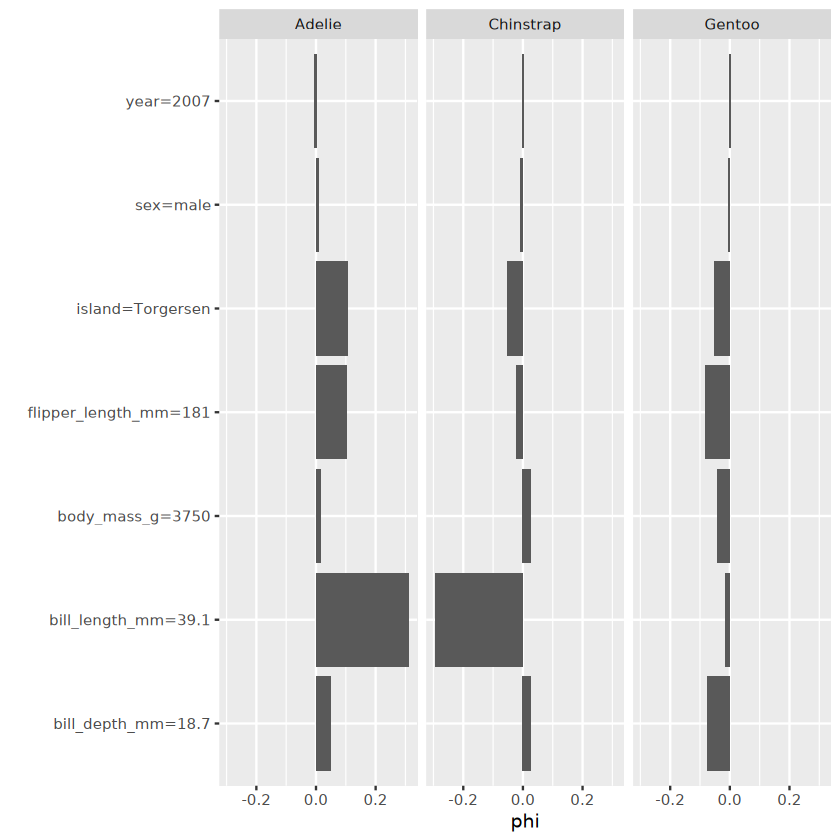

In [10]:
x <- penguins[which(names(penguins) != "species")]
model <- Predictor$new(learner,
    data = penguins,
    y = "species"
)
x.interest <- data.frame(penguins[1, ])
shapley <- Shapley$new(model,
    x.interest = x.interest
)
plot(shapley)


## Featurelmp

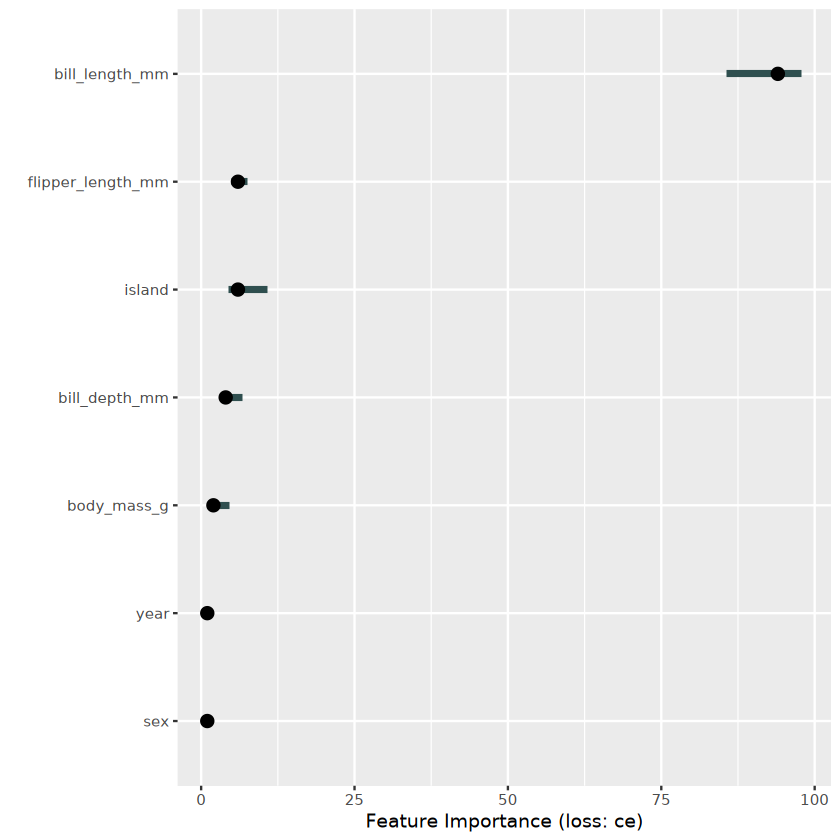

In [11]:
effect <- FeatureImp$new(model, loss = "ce")
effect$plot(features = num_features)


## 独立测试数据

In [16]:
task_peng$head()


species,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm,island,sex,year
<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<int>
Adelie,18.7,39.1,3750,181,Torgersen,male,2007
Adelie,17.4,39.5,3800,186,Torgersen,female,2007
Adelie,18.0,40.3,3250,195,Torgersen,female,2007
Adelie,19.3,36.7,3450,193,Torgersen,female,2007
Adelie,20.6,39.3,3650,190,Torgersen,male,2007
Adelie,17.8,38.9,3625,181,Torgersen,female,2007


In [17]:
split <- partition(task_peng,
    ratio = 0.8
)
train_set <- split$train
test_set <- split$test

learner$train(task_peng,
    row_ids = train_set
)
prediction <- learner$predict(task_peng,
    row_ids = test_set
)


In [18]:
prediction


<PredictionClassif> for 67 observations:
 row_ids     truth  response prob.Adelie prob.Chinstrap prob.Gentoo
      14    Adelie    Adelie  0.98270116     0.01729884 0.000000000
      17    Adelie    Adelie  0.97879524     0.02003810 0.001166667
      18    Adelie    Adelie  0.98485556     0.01197778 0.003166667
     ---       ---       ---         ---            ---         ---
     320 Chinstrap Chinstrap  0.44719568     0.54318209 0.009622222
     321 Chinstrap Chinstrap  0.05492908     0.94507092 0.000000000
     327 Chinstrap Chinstrap  0.07940124     0.89463209 0.025966667

Warning message in initialize(...):
“Model error is 0, switching from compare='ratio' to compare='difference'”


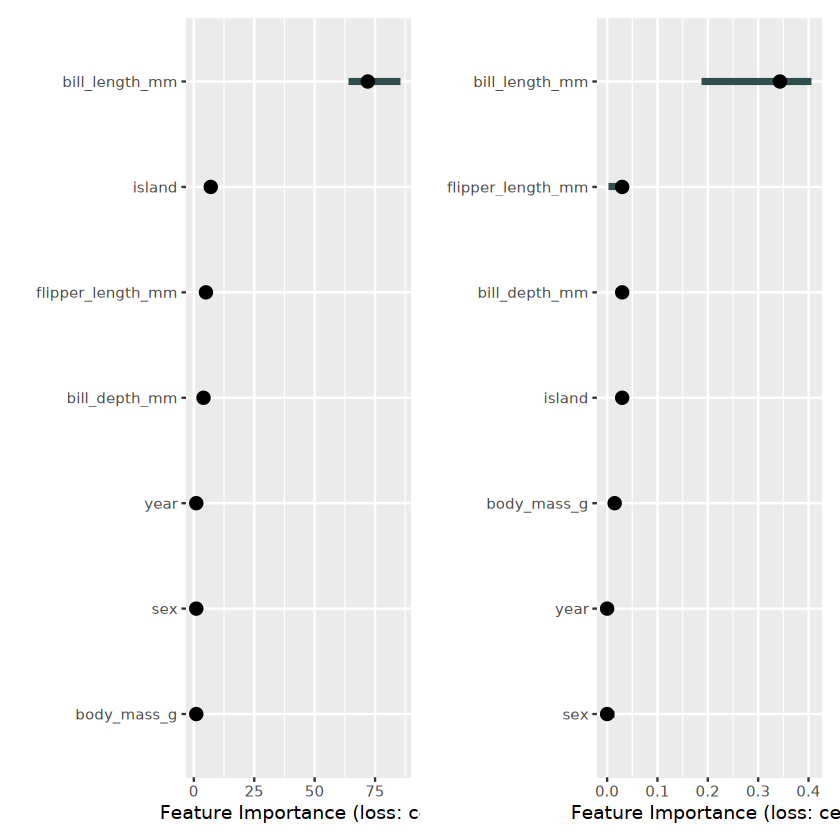

In [19]:
# 训练集
model <- Predictor$new(learner, data = penguins[train_set, ], y = "species")
effect <- FeatureImp$new(model, loss = "ce")
plot_train <- plot(effect, features = num_features)

# 测试集
model <- Predictor$new(learner, data = penguins[test_set, ], y = "species")
effect <- FeatureImp$new(model, loss = "ce")
plot_test <- plot(effect, features = num_features)

# 放到一起
library("patchwork")
plot_train + plot_test


分别查看`feasurelmp`：

In [21]:
train_set


[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  21  22  23
 [19]  24  25  28  29  30  31  33  36  37  39  42  43  44  45  46  47  48  49
 [37]  51  52  53  54  55  56  59  60  61  62  63  64  65  66  67  68  69  70
 [55]  71  73  75  76  78  80  81  82  83  84  85  86  87  90  91  93  94  95
 [73]  96  97  98 100 101 103 104 105 107 108 109 110 111 112 113 114 115 116
 [91] 117 118 119 120 121 122 123 124 126 128 129 130 131 132 133 134 135 136
[109] 137 138 140 141 142 143 144 145 146 147 148 149 150 153 154 155 157 158
[127] 159 160 161 162 163 164 166 167 168 170 171 172 173 175 177 178 179 183
[145] 184 185 186 187 190 191 192 193 194 195 196 197 199 200 201 202 203 204
[163] 205 206 207 208 209 210 211 212 213 214 215 216 217 218 221 224 225 226
[181] 227 228 229 230 231 233 234 235 237 238 239 240 242 243 244 245 246 247
[199] 248 249 250 251 252 254 255 256 259 260 262 263 264 265 267 268 269 270
[217] 271 272 273 275 276 278 279 280 281 283 285 286 287 288 290 291 292 294
[235] 295 296 297 298 301 302 303 304 305 307 308 309 310 311 313 314 315 316
[253] 317 318 319 322 323 324 325 326 328 329 330 331 332 333

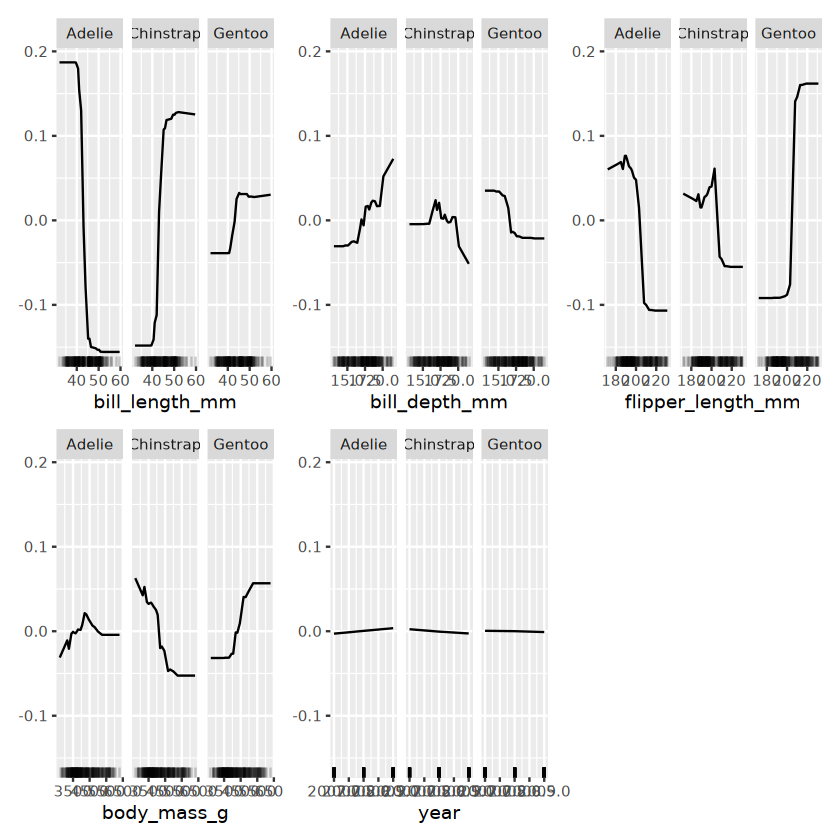

In [20]:
model <- Predictor$new(learner,
    data = penguins[train_set, ],
    y = "species"
)
effect <- FeatureEffects$new(model)
plot(effect, features = num_features)


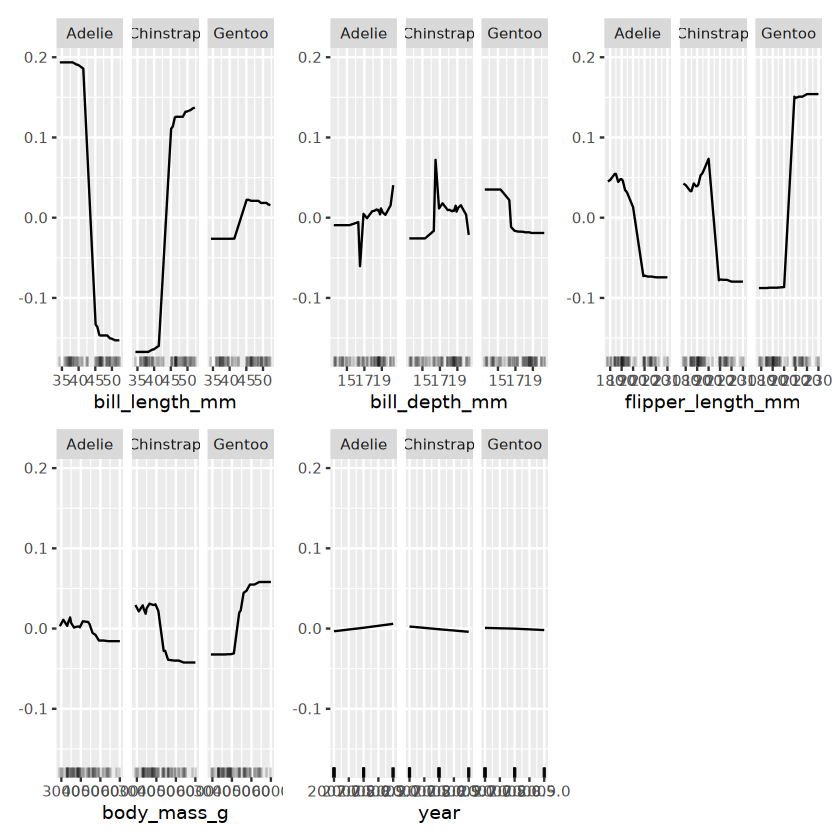

In [22]:
model <- Predictor$new(learner, data = penguins[test_set, ], y = "species")
effect <- FeatureEffects$new(model)
plot(effect, features = num_features)


## DALEX
这个包介绍的方法也有一本书：`Explanatory Model Analysis`。

`DALEX`包可透视预测模型，帮助我们探索、解释、可视化模型行为。将使用fifa20数据集进行演示。

这个包干的事情可通过下图理解：![](https://gitee.com/ayue2019/drawing-bed/raw/master/屏幕截图 2022-02-19 161952.png)

In [30]:
library(DALEX)


In [31]:
data(fifa, package = "DALEX")
fifa[1:2, c("value_eur", "age", "height_cm", "nationality", "attacking_crossing")]


,value_eur,age,height_cm,nationality,attacking_crossing
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
L. Messi,95500000,32,170,Argentina,88
Cristiano Ronaldo,58500000,34,187,Portugal,84


In [32]:
dim(fifa)


[1] 5000   42

In [33]:
fifa[, c("nationality", "overall", "potential", "wage_eur")] <- NULL
for (i in 1:ncol(fifa)) fifa[, i] <- as.numeric(fifa[, i])


## 建模

In [34]:
library(mlr3)
library(mlr3learners)

fifa_task <- as_task_regr(fifa, target = "value_eur")

fifa_ranger <- lrn("regr.ranger", num.trees = 250)
fifa_ranger$train(fifa_task)
fifa_ranger


<LearnerRegrRanger:regr.ranger>: Random Forest
* Model: ranger
* Parameters: num.threads=1, num.trees=250
* Packages: mlr3, mlr3learners, ranger
* Predict Types:  [response], se
* Feature Types: logical, integer, numeric, character, factor, ordered
* Properties: hotstart_backward, importance, oob_error, weights

## DALEX工作的一般流程

In [37]:
library("DALEXtra")


model %>%
    explain_mlr3(data = ..., y = ..., label = ...) %>%
    model_parts() %>%
    plot()


In [41]:
library("DALEX")
library("DALEXtra")


In [42]:
ranger_exp <- explain_mlr3(fifa_ranger,
    data = fifa,
    y = fifa$value_eur,
    label = "Ranger RF",
    colorize = FALSE
)


Preparation of a new explainer is initiated
  -> model label       :  Ranger RF 
  -> data              :  5000  rows  38  cols 
  -> target variable   :  5000  values 
  -> predict function  :  yhat.LearnerRegr  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package mlr3 , ver. 0.20.2 , task regression (  default  ) 
  -> predicted values  :  numerical, min =  423256.7 , mean =  7473327 , max =  88833467  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -8876320 , mean =  -39.57773 , max =  17972500  
  A new explainer has been created!  


数据集水平的探索

In [43]:
fifa_vi <- model_parts(ranger_exp)
head(fifa_vi)


,variable,permutation,dropout_loss,label
,<chr>,<dbl>,<dbl>,<chr>
1,_full_model_,0,1272193,Ranger RF
2,value_eur,0,1272193,Ranger RF
3,weight_kg,0,1330382,Ranger RF
4,movement_balance,0,1337063,Ranger RF
5,goalkeeping_kicking,0,1342123,Ranger RF
6,mentality_aggression,0,1347687,Ranger RF


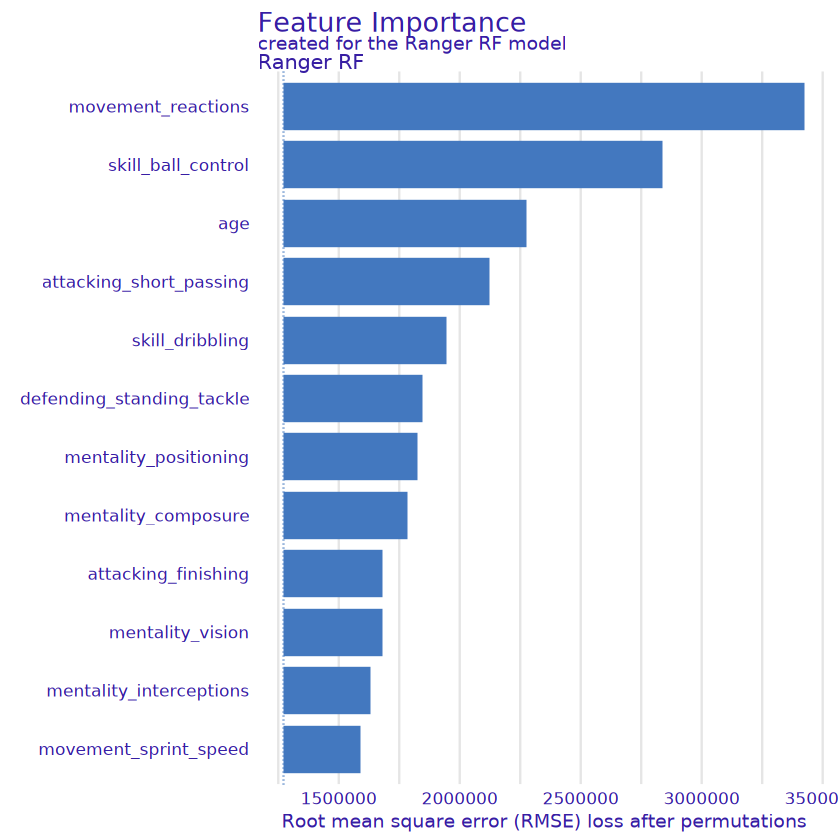

In [44]:
plot(fifa_vi, max_vars = 12, show_boxplots = F)


In [45]:
ranger_exp


Model label:  Ranger RF 
Model class:  LearnerRegrRanger,LearnerRegr,Learner,R6 
Data head  :
                  value_eur age height_cm weight_kg attacking_crossing
L. Messi           95500000  32       170        72                 88
Cristiano Ronaldo  58500000  34       187        83                 84
                  attacking_finishing attacking_heading_accuracy
L. Messi                           95                         70
Cristiano Ronaldo                  94                         89
                  attacking_short_passing attacking_volleys skill_dribbling
L. Messi                               92                88              97
Cristiano Ronaldo                      83                87              89
                  skill_curve skill_fk_accuracy skill_long_passing
L. Messi                   93                94                 92
Cristiano Ronaldo          81                76                 77
                  skill_ball_control movement_acceleration
L. Messi  

In [46]:
selected_variables <- c(
  "age",
  "movement_reactions",
  "skill_ball_control",
  "skill_dribbling"
)

fifa_pd <- model_profile(ranger_exp,
  variables = selected_variables
)$agr_profiles
fifa_pd


_vname_,_label_,_x_,_yhat_,_ids_
<chr>,<chr>,<dbl>,<dbl>,<dbl>
skill_ball_control,Ranger RF,5.00,7359992,0
skill_dribbling,Ranger RF,7.00,7844986,0
skill_dribbling,Ranger RF,11.00,7841199,0
skill_dribbling,Ranger RF,12.00,7838232,0
skill_dribbling,Ranger RF,13.00,7836780,0
skill_dribbling,Ranger RF,14.00,7836550,0
skill_ball_control,Ranger RF,15.00,7339537,0
skill_dribbling,Ranger RF,15.00,7836517,0
age,Ranger RF,16.00,9325674,0


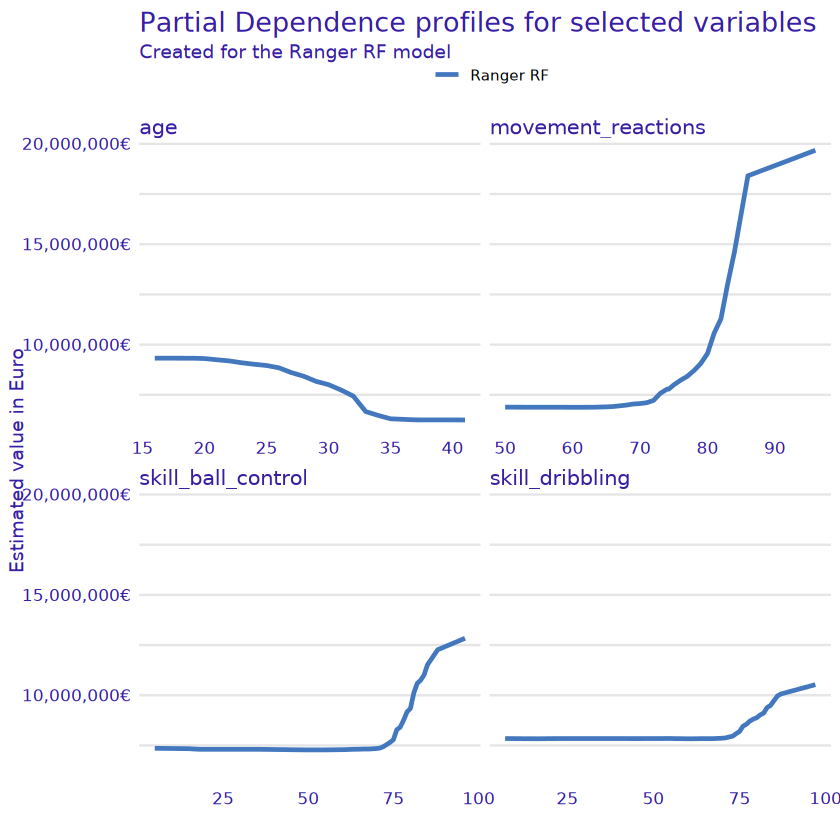

In [47]:
library("ggplot2")
plot(fifa_pd) +
    scale_y_continuous("Estimated value in Euro", labels = scales::dollar_format(suffix = "€", prefix = "")) +
    ggtitle("Partial Dependence profiles for selected variables")


## instance水平的探索

In [48]:
ronaldo <- fifa["Cristiano Ronaldo", ]
ronaldo_bd_ranger <- predict_parts(ranger_exp,
    new_observation = ronaldo
)
head(ronaldo_bd_ranger)


,variable,contribution,variable_name,variable_value,cumulative,sign,position,label
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<int>,<chr>
1,intercept,7473327,intercept,1,7473327,1,40,Ranger RF
2,movement_reactions = 96,11666968,movement_reactions,96,19140295,1,39,Ranger RF
3,skill_ball_control = 92,7452113,skill_ball_control,92,26592407,1,38,Ranger RF
4,mentality_positioning = 95,4229244,mentality_positioning,95,30821651,1,37,Ranger RF
5,attacking_finishing = 94,4615368,attacking_finishing,94,35437019,1,36,Ranger RF
6,skill_dribbling = 89,4867875,skill_dribbling,89,40304894,1,35,Ranger RF


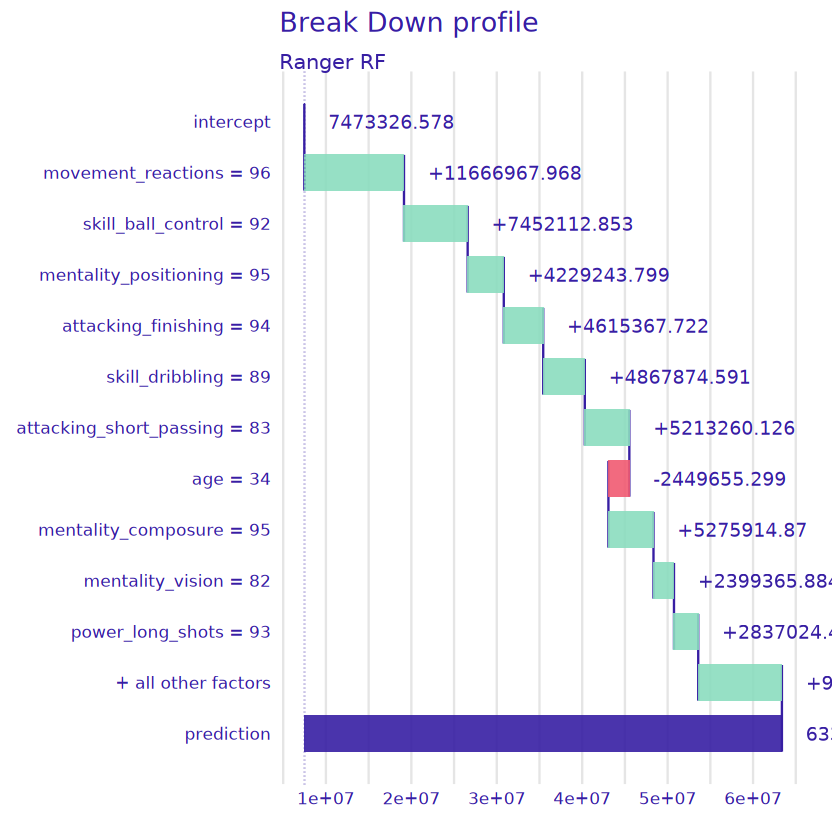

In [49]:
plot(ronaldo_bd_ranger)


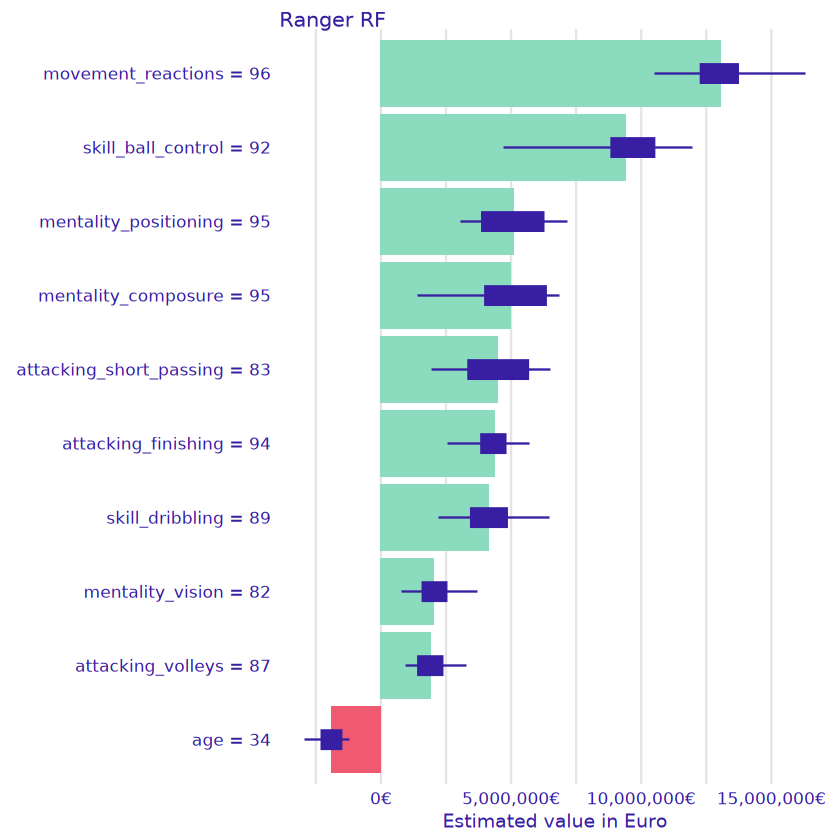

In [50]:
ronaldo_shap_ranger <- predict_parts(ranger_exp,
    new_observation = ronaldo,
    type = "shap"
)

plot(ronaldo_shap_ranger) +
    scale_y_continuous("Estimated value in Euro",
        labels = scales::dollar_format(
            suffix = "€",
            prefix = ""
        )
    )


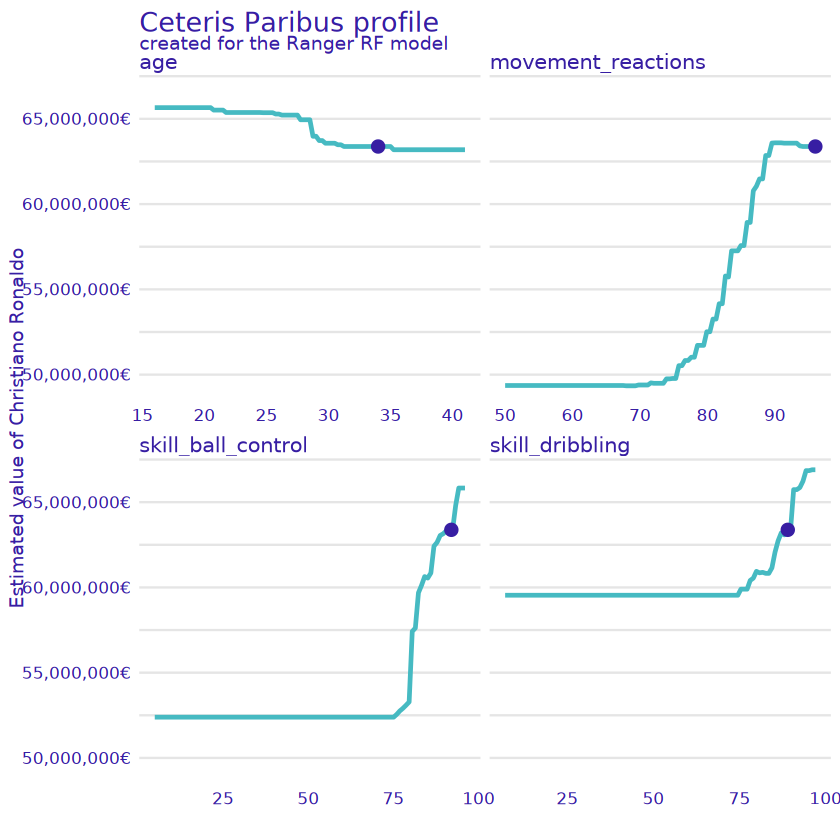

In [51]:
selected_variables <- c(
  "age",
  "movement_reactions",
  "skill_ball_control",
  "skill_dribbling"
)

ronaldo_cp_ranger <- predict_profile(ranger_exp,
  ronaldo,
  variables = selected_variables
)

plot(ronaldo_cp_ranger,
  variables = selected_variables
) +
  scale_y_continuous("Estimated value of Christiano Ronaldo",
    labels = scales::dollar_format(suffix = "€", prefix = "")
  )
